In [67]:
import pandas as pd
import numpy as np
import dataframe_image as dfi
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

df_fertility = pd.read_excel("Data/1.1_OECD_Fertility_rate.xlsx"  ,sheet_name="Chart SF2.1.A",
    usecols="L,N, O, R",
    skiprows=3 ,nrows=39) 

df_fertility = df_fertility.rename(columns={
    df_fertility.columns[0]: "Country",
    df_fertility.columns[1]: "1970",
    df_fertility.columns[2]: "1995",
    df_fertility.columns[3]: "2021"
})

df_fertility.set_index("Country", inplace=True)

df_fertility.head(39)

,1970,1995,2021
Country,,,
Korea,4.530000,1.634000,0.808000
Spain,2.900000,1.173000,1.190000
Italy,2.425000,1.193000,1.250000
Japan,2.130000,1.420000,1.300000
Poland,2.200000,1.545000,1.330000
Portugal,2.830000,1.409123,1.350000
Lithuania,2.400000,1.550000,1.360000
Luxembourg,1.980000,1.670000,1.380000
Canada,2.331000,1.670000,1.430000


In [61]:
print(df_fertility.columns)


Index(['1970', '1995', '2021'], dtype='object')


In [62]:
try:
    print(df_fertility.loc['Italy'])
except KeyError as e:
    print(f"Data for Italy not found: {e}")

1970    2.425
1995    1.193
2021    1.250
Name: Italy, dtype: float64


In [63]:
try:
    italy_1970_data = df_fertility.loc['Italy', '1970']
    print(f"Fertility rate for Italy in 1970: {italy_1970_data}")
except KeyError as e:
    print(f"Data not found: {e}")

Fertility rate for Italy in 1970: 2.425


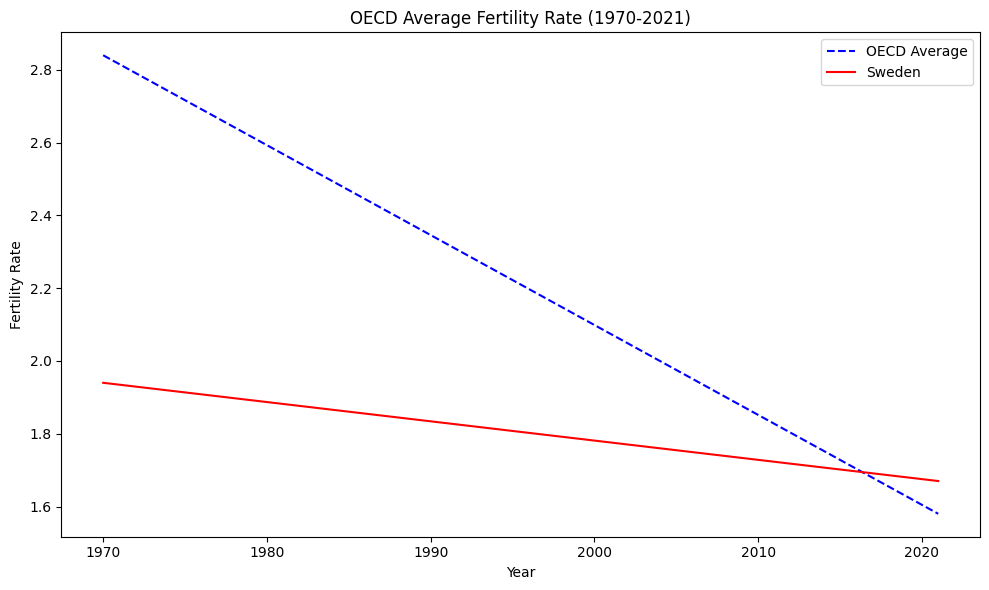

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

sweden_fertility = df_fertility.loc['Sweden', [
    '1970', '2021']].astype(float)


oecd_avg = [2.84, 1.58]


fig, ax = plt.subplots(figsize=(10, 6))

years = ["1970", "2021"]
years_all = list(map(int, years))
oecd_avg_all = list(map(float, oecd_avg))

ax.plot(years_all, oecd_avg_all, linestyle='--',
        color='blue', label='OECD Average')
ax.plot(years_all, sweden_fertility,
        linestyle='-', color='red', label='Sweden')


ax.set_xlabel('Year')
ax.set_ylabel('Fertility Rate')
ax.set_title('OECD Average Fertility Rate (1970-2021)')
ax.legend()

plt.tight_layout()
plt.show()

In [51]:
import pandas as pd
import plotly.graph_objects as go

sweden_fertility = df_fertility.loc['Sweden', [
    '1970', '1995', '2021']].astype(float)

print("Selected data:")
print("Sweden's fertility rates:")
print(sweden_fertility)

oecd_avg = [2.84, 1.77, 1.58]

print("OECD average:")
print(oecd_avg)

Selected data:
Sweden's fertility rates:
1970    1.940
1995    1.738
2021    1.670
Name: Sweden, dtype: float64
OECD average:
[2.84, 1.77, 1.58]


C:\Users\Delic\AppData\Local\Temp\ipykernel_11220\59276231.py:23: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



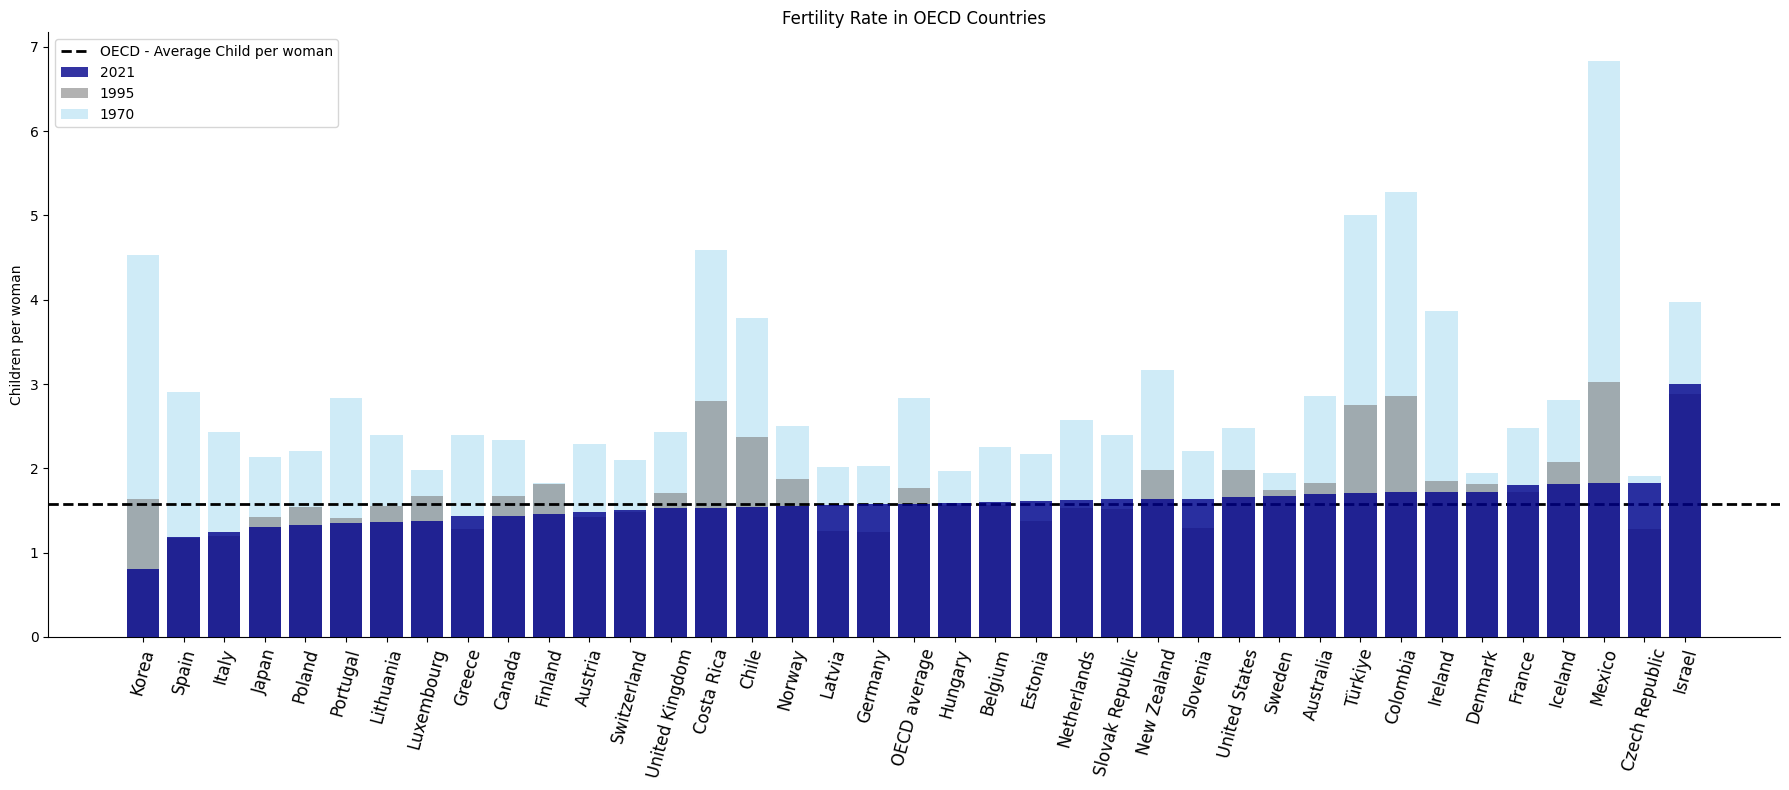

In [107]:

fig, ax = plt.subplots(figsize=(18, 8))


df_fertility_sorted = df_fertility.sort_values('2021', ascending=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.bar(df_fertility_sorted.index.astype(str),
       df_fertility_sorted['2021'], color='darkblue', label='2021', alpha=0.8,  zorder=3)

ax.bar(df_fertility_sorted.index.astype(str),
       df_fertility_sorted['1995'], color='grey', label='1995', alpha=0.6, zorder=2)
ax.bar(df_fertility_sorted.index.astype(str),
       df_fertility_sorted['1970'], color='skyblue', label='1970', alpha=0.4, zorder=1)



ax.axhline(y=1.58, color='black', linewidth=2, linestyle='--',
           label='OECD - Average Child per woman')

ax.set_ylabel('Children per woman')
ax.set_title('Fertility Rate in OECD Countries')
ax.set_xticklabels(df_fertility_sorted.index.astype(
    str), rotation=75, fontsize=12)


ax.legend()


plt.tight_layout()  
plt.show()